# Алгоритмы анализа данных

### Урок 1. Алгоритм линейной регрессии. Градиентный спуск

## <center> Практическое задание </center> 

**1. Подберите скорость обучения(alpha $\alpha$) и количество итераций (градиентный спуск):**

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array(
    [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
    ]
)

X.shape

(2, 10)

No handles with labels found to put in legend.


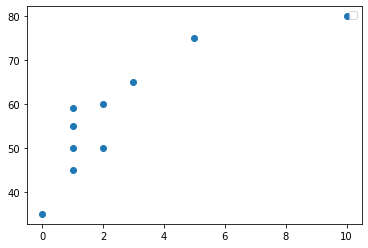

In [9]:
a = 2
b = 50
plt.scatter(X[1, :], y)
# y = a*x + b #
# plt.plot(X[1, :], a*X[1, :] + b, label="model_1")
# plt.plot(X[1, :], 2*a*X[1, :] + 50, label="model_2")
plt.legend(loc='best')

In [10]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [11]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

### Градиентный спуск

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки 

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

In [29]:
X, X.shape  # размер нашего датасета

(array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]]),
 (2, 10))

In [30]:
# количество объектов n = 10
# количество признаков = 2

n = X.shape[1]
n

10

In [31]:
# скорость обучения (базовый шаг alpha) 
alpha = 1e-02
#alpha = 1e-03
#alpha = 1e-04
#alpha = 1e-08
#alpha = 1e-10
#alpha = 1e-15

# задаём начальный вектор весов
W = np.array([1, 0.5])

W, alpha

(array([1. , 0.5]), 0.01)

In [37]:
# k - число итераций, с делать динамическим
k = 1500
k = 5000
# k = 10000
k_array = np.array([1500, 5000, 10000])
for s in range(len(k_array)):
    W = np.array([1, 0.5])
    k = k_array[s]
    print(f'\ns={s}, k={k}, k_array={k_array}\n')
    for i in range(k):
        y_pred = W @ X  # вычисляем вектор прогнозов
        err = calc_mse(y, y_pred)  # вычисляем ошибку

        # в цикле по вектору весов, вычисляем новые веса (Формула вычисления градиента)
        for ii in range(W.shape[0]):
            # W[ii] = W[ii] - alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
            # W[ii] - веса на предыдущей итерации
            # alpha - скорость обучения
            # (1 / n * 2 * np.sum(X[ii] * (y_pred - y))) - градиент функции потерь
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if i % 100 == 0:
            print(i, W, err, k, alpha)  # i - итерация, W - вектор весов, err -значение ошибки

# k = 1500
# 1400 [47.23212359  3.91071784] 45.93750000020376 k = 1500 alpha = 1e-02 
# 1400 [36.9651021  5.8066019] 102.7269452082483 k = 1500 alpha = 1e-03 
# 1400 [ 9.08081151 10.78209811] 827.7864098809556 k = 1500 alpha = 1e-04 
# 1400 [1.00154371 0.50476237] 3171.3623257032023 k = 1500 alpha = 1e-08 
# 1400 [1.00001544 0.50004763] 3173.1321159086465 k = 1500 alpha = 1e-10 
# 1400 [1.  0.5] 3173.1499998211925  k = 1500 alpha = 1e-15 

# k = 5000
# 4900 [47.23214286  3.91071429] 45.9375 k = 5000 alpha = 1e-02
# 4900 [46.96291178  3.96042986] 45.9765505745093  k = 5000 alpha = 1e-03 
# 4900 [20.74111664  8.80248048] 423.30222424803867 k = 5000 alpha = 1e-04 
# 4900 [1.00539852 0.5166508 ] 3166.8996306920635 k = 5000 alpha = 1e-08 
# 4900 [1.00005401 0.50016663] 3173.0874063301508 k = 5000 alpha = 1e-10 
# 4900 [1.  0.5] 3173.149999374173 k = 5000 alpha = 1e-15

# k = 10000
# 9900 [47.23214286  3.91071429] 45.9375 10000 0.01
# 9900 [47.23066001  3.9109881 ] 45.93750118459529 10000 0.001
# 9900 [31.48137887  6.81921334] 179.34093406577975 10000 0.0001
# 9900 [1.01090117 0.53361199] 3160.5404050441257 10000 1e-08
# 9900 [1.00010911 0.50033663] 3173.0235371142035 10000 1e-10
# 9900 [1.  0.5] 3173.1499987355733 10000 1e-15


s=0, k=1500, k_array=[ 1500  5000 10000]

0 [2.102 3.9  ] 3173.15 1500 0.01
100 [31.88770806  6.74418155] 175.19445858001848 1500 0.01
200 [41.83683774  4.90699865] 61.9177717428135 1500 0.01
300 [45.33508261  4.26102097] 47.913169919666764 1500 0.01
400 [46.56511152  4.03388672] 46.18175564810758 1500 0.01
500 [46.99760587  3.95402334] 45.96769776787538 1500 0.01
600 [47.14967657  3.92594232] 45.941233404700036 1500 0.01
700 [47.20314662  3.91606866] 45.93796156758049 1500 0.01
800 [47.2219474   3.91259695] 45.937557064435396 1500 0.01
900 [47.228558    3.91137626] 45.937507054979434 1500 0.01
1000 [47.23088237  3.91094704] 45.937500872219886 1500 0.01
1100 [47.23169965  3.91079613] 45.937500107834126 1500 0.01
1200 [47.23198702  3.91074306] 45.93750001333172 1500 0.01
1300 [47.23208806  3.9107244 ] 45.93750000164824 1500 0.01
1400 [47.23212359  3.91071784] 45.93750000020376 1500 0.01

s=1, k=5000, k_array=[ 1500  5000 10000]

0 [2.102 3.9  ] 3173.15 5000 0.01
100 [31.88770806  6.744

### Вывод

Наибольшее значение для модели, имеет <u>скорость обучения</u> $\alpha$ и затем <u>количество итераций</u> k.<br />

При $\alpha=0.01$ и $k=1500$:
<center>вектор весов $W$=[47.23212359,&nbsp;3.91071784] и ошибка $err=45.93750000020376$</center>

При $\alpha=0.01$ и $k=5000$:
<center> вектор весов $W$=[47.23214286,&nbsp; 3.91071429] и ошибка $err=45.9375$ </center> <br /> и не меняется после шага $i=3200$.<br />
Значения вектора весов и ошибки совпадают с базисными значениями.<br />

__Базисные значения__: <center>$W$ = [47.23214286,&nbsp; 3.91071429], $err$=45.93749999999999</center>

При уменьшении скорости обучения $\alpha < 0.01$ значение ошибки увеличивается, а вектор весов меньше отлечается от значений начального вектора весов [1, 0.5]. <br />
При этом даже значительное увеличение значения количества итераций, не позволяет достич базовых значений вектора весов $W$ и ошибки $err$:

Например, для $k=10000$:
- $\alpha=0.01$ ($шаг=3200$): $W$=[47.23214286, 3.91071429], $err$=45.9375
- $\alpha=0.001$ ($шаг=9900$): $W$=[47.23066001  3.9109881 ], $err$=45.93750118459529 
- $\alpha=0.0001$ ($шаг=9900$): $W$=[31.48137887  6.81921334], $err$=179.34093406577975
- $\alpha=1e-08$ ($шаг=9900$): $W$=[1.01090117 0.53361199], $err$=3160.5404050441257
- $\alpha=1e-10$ ($шаг=9900$): $W$=[1.00010911 0.50033663], $err$=3173.0235371142035
- $\alpha=1e-15$ ($шаг=9900$): $W$=[1.  0.5], $err$=3173.1499987355733

In [16]:
# Базисные значения:
W_norm = np.linalg.inv(np.dot(X, X.T)) @ X @ y
y_pred = W_norm @ X  # вычисляем вектор прогнозов
err = calc_mse(y, y_pred)  # вычисляем ошибку
W_norm, err

(array([47.23214286,  3.91071429]), 45.93749999999999)

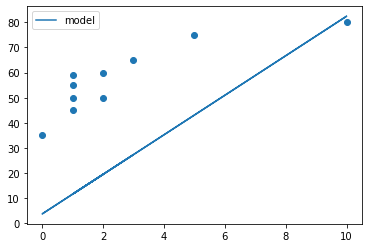

In [17]:
# Построим график найденного значения
# 𝛼=0.01 k=5000: вектор весов 𝑊 =[47.23214286, 3.91071429], ошибка 𝑒𝑟𝑟=45.9375
plt.scatter(X[1, :], y)
plt.plot(X[1, :], W[1]*X[1, :] + W[0], label="model")
plt.legend(loc='best')

**2\*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [18]:
W = np.array([1, 0.5])

In [19]:
for i in range(287):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # циклы с numpy-объектами или pandas-объектами использовать не рекомендуетсяю,  это очень медленно.
    # Лучше использовать векторные операции.
    ''' for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y))) '''
    W -= (alpha * (1 / n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [5.502 5.002] 3173.15
100 [11.82211538 11.32211538] 737.091826923077
200 [11.82211538 11.32211538] 737.091826923077
